# geometry_tools usage

This notebook shows some example usage for the [geometry tools](https://github.com/tjweisman/geometry_tools) Python package I've written.

You'll need to have [matplotlib](https://matplotlib.org/) and the [geometry_tools](https://github.com/tjweisman/geometry_tools) package installed for this to run.

In [1]:
import matplotlib.pyplot as plt

from geometry_tools import hyperbolic, coxeter

Create a triangle group object and get its canonical representation:

In [2]:
triangle_group = coxeter.TriangleGroup([3,3,4])
rep = triangle_group.canonical_representation()

rep["a"], rep["b"], rep["c"]

(array([[-1.        ,  1.        ,  1.41421356],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[ 1.,  0.,  0.],
        [ 1., -1.,  1.],
        [ 0.,  0.,  1.]]),
 array([[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 1.41421356,  1.        , -1.        ]]))

The canonical representation preserves a symmetric bilinear form determined by the Coxeter matrix. We can get a conjugated representation which preserves a diagonal form instead:

In [3]:
rep = triangle_group.diagonal_rep()

rep["a"], rep["b"], rep["c"]

(array([[ 1.10428824,  0.20352237,  0.42193739],
        [-0.20352237,  0.60281854, -0.82342648],
        [-0.42193739, -0.82342648, -0.70710678]]),
 array([[ 1.07966913e+00, -4.07044746e-01, -1.47830134e-16],
        [ 4.07044746e-01, -1.07966913e+00, -5.90002792e-16],
        [ 4.54351676e-16, -1.10297403e-15,  1.00000000e+00]]),
 array([[ 1.10428824,  0.20352237, -0.42193739],
        [-0.20352237,  0.60281854,  0.82342648],
        [ 0.42193739,  0.82342648, -0.70710678]]))

We can turn this into a representation into PO(2,1) using the `hyperbolic.HyperbolicRepresentation` class. First we need to create a `HyperbolicPlane` object.

In [4]:
plane = hyperbolic.HyperbolicPlane()
hyperbolic_rep = hyperbolic.HyperbolicRepresentation.from_matrix_rep(plane, rep)

print(hyperbolic_rep["a"])

Isometry with data:
[[ 1.10428824 -0.20352237 -0.42193739]
 [ 0.20352237  0.60281854 -0.82342648]
 [ 0.42193739 -0.82342648 -0.70710678]]


Warning: the underlying matrix of this isometry is a row matrix, acting on the right!

## Drawing reflection walls

Get the reflection walls:

In [5]:
wall_a = hyperbolic.Hyperplane.from_reflection(plane, rep["a"])
wall_b = hyperbolic.Hyperplane.from_reflection(plane, rep["b"])
wall_c = hyperbolic.Hyperplane.from_reflection(plane, rep["c"])

(-1.1, 1.1)

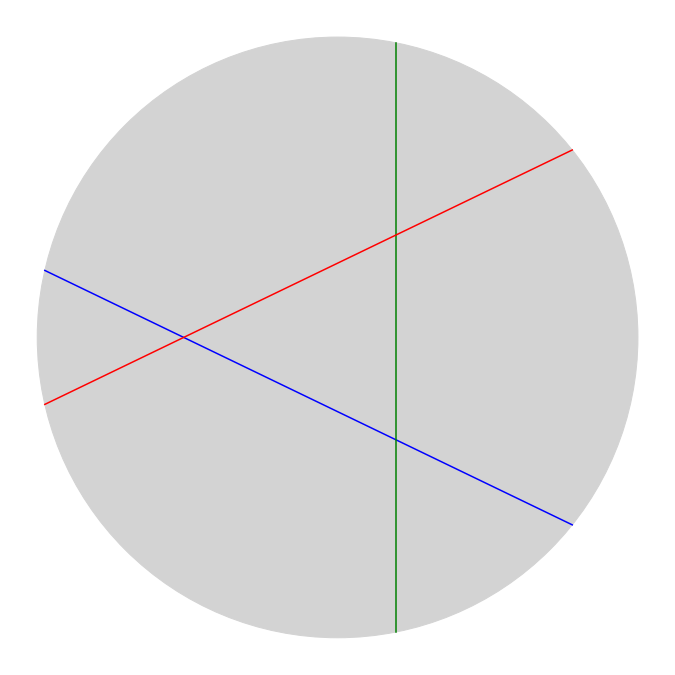

In [6]:
from matplotlib.patches import Circle, Arc 

fig, ax = plt.subplots(figsize=(10,10))

#the unit circle
h2_figure = Circle((0.,0.), 1.0, color="lightgray")
ax.add_patch(h2_figure)

xa, ya = wall_a.ideal_basis_coords().T
xb, yb = wall_b.ideal_basis_coords().T
xc, yc = wall_c.ideal_basis_coords().T

plt.plot(xa, ya, color="blue")
plt.plot(xb, yb, color="green")
plt.plot(xc, yc, color="red")

#some boilerplate to make the plot look a little nicer
plt.tight_layout()
ax.axis("off")
ax.set_aspect("equal")
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))

We can also do this in Poincare coordinates. For convenience we'll wrap some of the plotting boilerplate into a function.

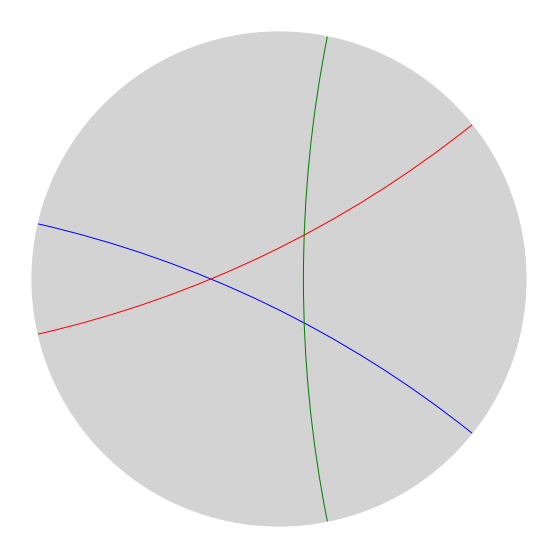

In [7]:
def get_plot_axis():
    fig, ax = plt.subplots(figsize=(10,10))
    ax.axis("off")
    ax.set_aspect("equal")
    ax.set_xlim((-1.1, 1.1))
    ax.set_ylim((-1.1, 1.1))
    
    #the unit circle
    h2_figure = Circle((0.,0.), 1.0, color="lightgray")
    ax.add_patch(h2_figure)
    
    return ax

ax = get_plot_axis()

#get circle parameters
ctr_a, rad_a, theta_a = wall_a.circle_parameters()
ctr_b, rad_b, theta_b = wall_b.circle_parameters()
ctr_c, rad_c, theta_c = wall_c.circle_parameters()

#make arcs
arc_a = Arc(ctr_a, rad_a * 2, rad_a * 2, theta1=theta_a[0], theta2=theta_a[1], color="blue")
arc_b = Arc(ctr_b, rad_b * 2, rad_b * 2, theta1=theta_b[0], theta2=theta_b[1], color="green")
arc_c = Arc(ctr_c, rad_c * 2, rad_c * 2, theta1=theta_c[0], theta2=theta_c[1], color="red")

#add arcs to plot
ax.add_patch(arc_a)
ax.add_patch(arc_b)
ax.add_patch(arc_c)

## Tesselating the plane in Poincare and Kleinian coordinates

Get a reflection wall and translate it by isometries:

In [8]:
wall = hyperbolic.Hyperplane.from_reflection(plane, rep["a"])

words = hyperbolic_rep.free_words_less_than(6)

isometries = hyperbolic_rep.isometries(words)

translated_walls = isometries.apply(wall)

This code is very inefficient. It would be better if we could use an automatic structure to reduce redundancy. (Actually, I have code to do this, but it's not ready for public consumption. Let me know if you want it.)

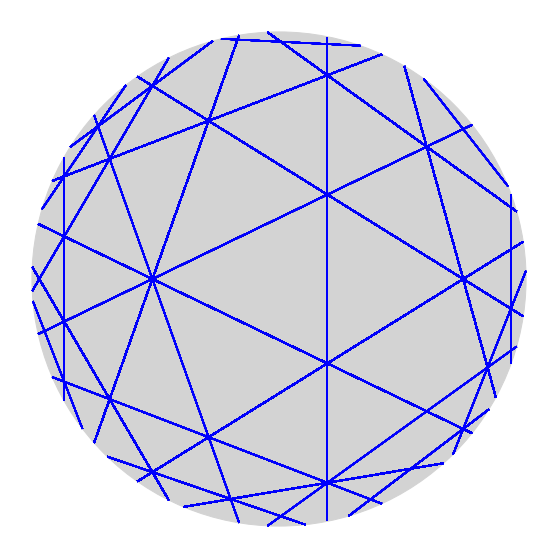

In [9]:
from matplotlib.collections import LineCollection

ax = get_plot_axis()
lines = LineCollection(translated_walls.ideal_basis_coords(), color="blue")
ax.add_collection(lines)

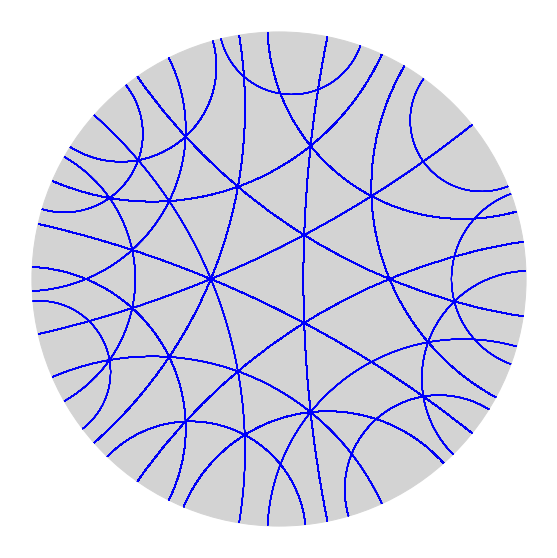

In [10]:
from matplotlib.collections import LineCollection

ax = get_plot_axis()

ctrs, rs, thetas = translated_walls.circle_parameters()
for ctr, r, theta in zip(ctrs, rs, thetas):
    arc = Arc(ctr, r * 2, r * 2, theta1=theta[0], theta2=theta[1], color="blue")
    ax.add_patch(arc)

## Regular polygons

Drawing a regular polygon with a given interior angle or radius:

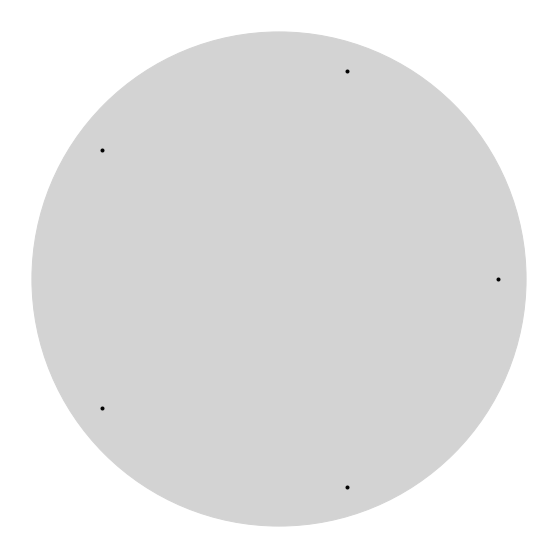

In [11]:
polygon = plane.regular_polygon(5, 1.4)

#polygon vertices
x,y = polygon.kleinian_coords().T

ax = get_plot_axis()

plt.plot(x,y, 'k.')

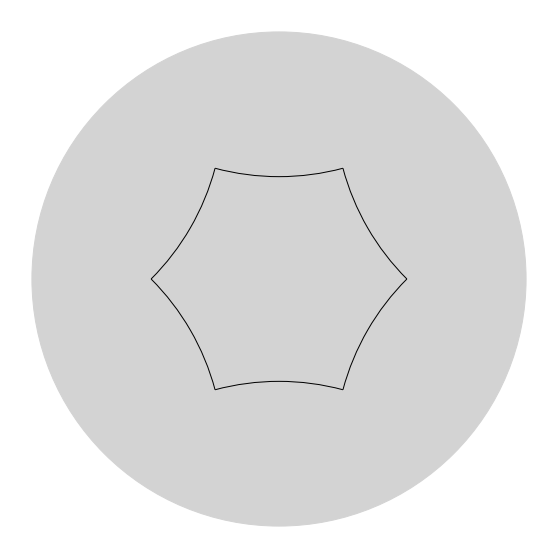

In [12]:
from math import pi

#make a regular right-angled hexagon
r = plane.regular_polygon_radius(6, pi/2)
hexagon = plane.regular_polygon(6, r)

#rotate the hexagon by 2pi / 6
rot = plane.get_standard_rotation(pi / 3)
rotated_hex = rot.apply(hexagon)

#get the segments joining the vertices of the original hexagon with the vertices of the rotated hexagon
segments = hyperbolic.Segment(plane, hexagon, rotated_hex)

#draw the segments in Poincare coordinates
ax = get_plot_axis()

ctrs, rads, thetas = segments.circle_parameters()
for ctr, rad, theta in zip(ctrs, rads, thetas):
    arc = Arc(ctr, rad * 2, rad * 2, theta1=theta[0], theta2=theta[1])
    ax.add_patch(arc)

## Surface group representations

First, we build a fundamental domain of the right shape (regular octagon of a certain radius), and construct the unit tangent vectors at each vertex pointing to the next vertex.

In [13]:
#get a regular 4g-gon with the right radius for a surface group
octagon = plane.regular_surface_polygon(2)

#apply a rotation by pi/4 to it
rot = plane.get_standard_rotation(2 * pi / 8)
octagon2 = rot.apply(octagon)

#poincare coordinates of the vertices
x,y = octagon.poincare_coords().T

#get the geodesic segments between the vertices of the original polygon and 
#the vertices of the rotated polygon
segment = hyperbolic.Segment(plane, octagon, octagon2)

#find the unit tangent vectors
forward_tv = octagon.unit_tangent_towards(octagon2)
backward_tv = rot.inv().apply(octagon2.unit_tangent_towards(octagon))

Next, we build the representation by finding the (unique) orientation-preserving isometries identifying pairs of these unit tangent vectors.

In [14]:
surface_gp_rep = hyperbolic.HyperbolicRepresentation(plane)

surface_gp_rep["a"] = forward_tv[0].isometry_to(backward_tv[3])
surface_gp_rep["b"] = forward_tv[1].isometry_to(backward_tv[4])
surface_gp_rep["c"] = forward_tv[4].isometry_to(backward_tv[7])
surface_gp_rep["d"] = forward_tv[5].isometry_to(backward_tv[0])

words = surface_gp_rep.free_words_less_than(3)
isometries = surface_gp_rep.isometries(words)

#'segment' is an array of 8 segments. We want each isometry to
#apply to each segment, so we apply pairwise instead of elementwise
translated_segments = isometries.apply(segment, "pairwise")

#this gives us an 8x8 array of segments, so we flatten to an array of 64 segments
to_draw = translated_segments.flatten_to_unit()

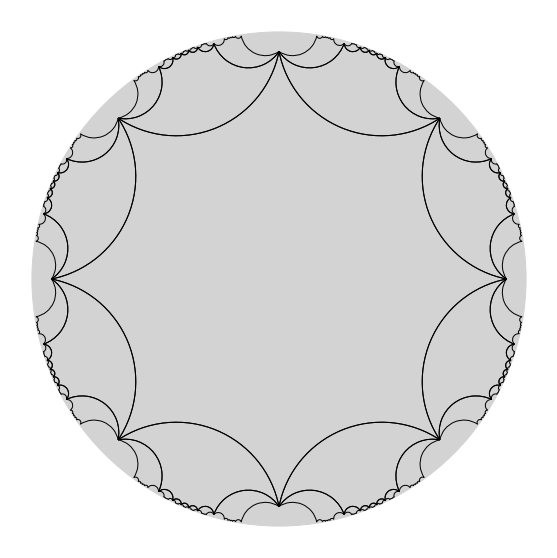

In [15]:
ax = get_plot_axis()

ctrs, rads, thetas = to_draw.circle_parameters()
for ctr, rad, theta in zip(ctrs, rads, thetas):
    arc = Arc(ctr, rad * 2, rad * 2, theta1=theta[0], theta2=theta[1])
    ax.add_patch(arc)

(<class 'geometry_tools.hyperbolic.Isometry'>, array([[ 5502241.75966055, -4346092.45462333,  3374336.19510871],
       [ 1992713.33078753, -1573997.21862278,  1222063.49035862],
       [ 5128718.93976035, -4051055.71177499,  3145267.17198326]]))